In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pdpipe as pdp
import geopandas as gpd
import descartes

from shapely.geometry import Point, Polygon, MultiPolygon

In [3]:
name_main = "dataset_8"

original_nta = pd.read_csv(name_main+".csv")
nta = original_nta
nta.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Bath Beach,Brooklyn,BK27,33163,2210,1826,1922,1657,1726,2850,...,1223,927,1290,2074,1352,1758,706,585,58243,75950
1,Bay Ridge,Brooklyn,BK31,79134,5166,4513,3379,3551,4347,6827,...,3235,3047,3542,5570,4108,4827,2497,2775,63539,86319
2,Bedford,Brooklyn,BK75,75318,7480,6580,5378,4635,6479,8683,...,3385,2509,3124,3706,2269,2847,1195,1034,39970,62616
3,Bensonhurst East,Brooklyn,BK29,64267,4151,3563,2891,3470,4182,4939,...,2718,2185,2655,3898,2558,2416,1144,844,48097,65715
4,Bensonhurst West,Brooklyn,BK28,91646,6498,5162,4529,4648,5793,8036,...,3383,3246,4036,5117,3428,3743,1649,1231,51035,70198


In [4]:
nta.set_index("nta_code", inplace=True)

pipe = pdp.ColDrop("nta_name")
pipe += pdp.RowDrop({"borough": lambda b : b in ["Staten Island","Queens"]})

'''
all nta boroughs (guess): ['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island']
'''
nta = pipe(nta)
nta

,borough,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
nta_code,,,,,,,,,,,,,,,,,,,,,
BK27,Brooklyn,33163,2210,1826,1922,1657,1726,2850,2771,2442,...,1223,927,1290,2074,1352,1758,706,585,58243,75950
BK31,Brooklyn,79134,5166,4513,3379,3551,4347,6827,6876,5459,...,3235,3047,3542,5570,4108,4827,2497,2775,63539,86319
BK75,Brooklyn,75318,7480,6580,5378,4635,6479,8683,6984,5586,...,3385,2509,3124,3706,2269,2847,1195,1034,39970,62616
BK29,Brooklyn,64267,4151,3563,2891,3470,4182,4939,4634,4677,...,2718,2185,2655,3898,2558,2416,1144,844,48097,65715
BK28,Brooklyn,91646,6498,5162,4529,4648,5793,8036,7766,5917,...,3383,3246,4036,5117,3428,3743,1649,1231,51035,70198
BK88,Brooklyn,105913,14350,11602,10077,8104,7754,8329,6880,5720,...,4619,3829,3442,3888,2221,2751,978,856,36893,59062
BK19,Brooklyn,34157,1938,1897,1582,1489,1733,2267,2210,2139,...,1522,1273,1391,2147,995,1228,689,667,35699,61590
BK09,Brooklyn,24140,1592,775,564,1055,1527,2358,3073,2532,...,579,555,733,971,1205,2013,1329,2925,116189,178252
BK81,Brooklyn,60124,5246,3895,4882,4243,4548,5420,4341,3883,...,3048,2328,3073,2626,1274,1019,181,146,24504,37892


In [5]:
name_map = "dataset_9"

original_nta_map = pd.read_csv(name_map+".csv")
nta_map = original_nta_map
nta_map.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821272,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [6]:
outside_codes = set(nta_map.columns).difference(set(nta.index))

pipe_map = pdp.ColDrop(columns=outside_codes)

nta_map = pipe_map(nta_map)
nta_map.head()

,BK88,BK27,BK28,BK29,BK19,BK75,BK81,BK09,BK31
0,-73.976051,-74.002005,-73.979640,-73.974778,-73.960351,-73.941932,-73.898808,-73.992365,-74.032667
1,40.631284,40.594141,40.615573,40.612647,40.587315,40.700733,40.657415,40.689698,40.643729
2,-73.977167,-74.002193,-73.980222,-73.974586,-73.960319,-73.944389,-73.898887,-73.994362,-74.032608
3,40.630755,40.594365,40.615013,40.611622,40.586523,40.700433,40.657403,40.690248,40.643707
4,-73.977000,-74.002304,-73.980806,-73.974517,-73.960319,-73.944244,-73.899043,-73.996234,-74.029057


In [9]:
boroughs = {}
for code in nta_map.columns:
    lats = list(nta_map.code)[::2]
    longs = list(nta_map.code)[::2]
    try:
        assert len(lats)==len(longs), str(code)+" doesn't have same no. of lats & longs..."
        boroughs[code] = Polygon([[lats[i] longs[i]] for i in range(len(lats))])
    except:
        pass
    

0   -73.976051
1    40.631284
2   -73.977167
3    40.630755
4   -73.977000
5    40.629880
6   -73.976851
7    40.629097
8   -73.976697
Name: BK88, dtype: float64

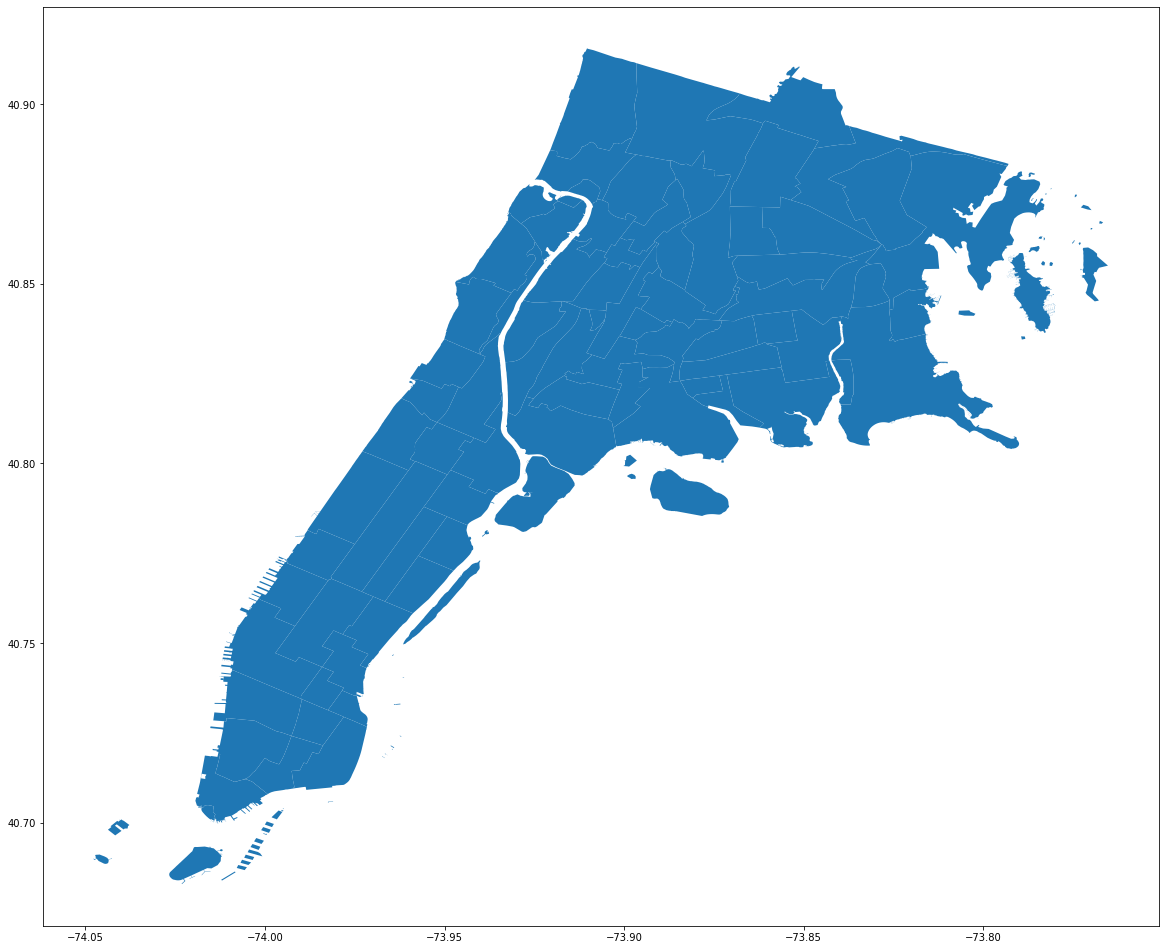

In [8]:
#expected result

out_nta = gpd.read_file("NTA map/geo_export_20a5e299-1421-4147-af3b-c2568e9598ad.shp")

out_nta.head()

out_nta.set_index("ntacode")
pipe = pdp.ColDrop("ntaname")
pipe += pdp.RowDrop({"boroname": lambda b : b in ["Staten Island","Queens","Brooklyn"]})

out_nta = pipe(out_nta)
fig,ax = plt.subplots(figsize = (20,20))
out_nta.plot(ax=ax)
